# Breast Cancer Wisconsin (Diagnostic) Data Set


# Importo las librerias

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import os
warnings.filterwarnings("ignore")
import datetime

from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *




# Preparacion del dataset

In [4]:
!git clone https://github.com/aconeop/monografia_udea.git

Cloning into 'monografia_udea'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 190 (delta 25), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (190/190), 11.49 MiB | 18.32 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [5]:
df=pd.read_csv('/content/monografia_udea/new/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.describe()      #description of dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.shape       #569 rows and 33 columns

(569, 33)

In [9]:
df.columns     #displaying the columns of dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Recuento de los datos nulos por columna

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Eliminacion de columna con valores contenida solo por valores nulos

In [11]:
df.drop('Unnamed: 32', axis = 1, inplace = True)


In [12]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Ahora que ya borramos la columna vacia, y teniendo en cuenta las variables y su contenido, hago ajustes en sus tipos para optimizar el df. Primero me aseguro del tipo y la longitud maxima que se requiere por cada variable, para ajustar su tipo.

In [13]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [14]:
# Diccionario para almacenar la longitud máxima encontrada en cada columna
max_lengths = {}

# Iterar sobre cada columna del DataFrame
for column in df.columns:
    # Calcular la longitud máxima de los valores en la columna actual
    max_length = df[column].astype(str).apply(len).max()
    # Almacenar la longitud máxima en el diccionario
    max_lengths[column] = max_length

# Imprimir la longitud máxima encontrada en cada columna
for column, max_length in max_lengths.items():
    print(f"Columna '{column}'--> Máximo de dígitos = {max_length}")


Columna 'id'--> Máximo de dígitos = 9
Columna 'diagnosis'--> Máximo de dígitos = 1
Columna 'radius_mean'--> Máximo de dígitos = 5
Columna 'texture_mean'--> Máximo de dígitos = 5
Columna 'perimeter_mean'--> Máximo de dígitos = 5
Columna 'area_mean'--> Máximo de dígitos = 6
Columna 'smoothness_mean'--> Máximo de dígitos = 7
Columna 'compactness_mean'--> Máximo de dígitos = 7
Columna 'concavity_mean'--> Máximo de dígitos = 9
Columna 'concave points_mean'--> Máximo de dígitos = 8
Columna 'symmetry_mean'--> Máximo de dígitos = 6
Columna 'fractal_dimension_mean'--> Máximo de dígitos = 7
Columna 'radius_se'--> Máximo de dígitos = 6
Columna 'texture_se'--> Máximo de dígitos = 6
Columna 'perimeter_se'--> Máximo de dígitos = 6
Columna 'area_se'--> Máximo de dígitos = 5
Columna 'smoothness_se'--> Máximo de dígitos = 8
Columna 'compactness_se'--> Máximo de dígitos = 8
Columna 'concavity_se'--> Máximo de dígitos = 9
Columna 'concave points_se'--> Máximo de dígitos = 8
Columna 'symmetry_se'--> Máxim

Convierto variable 'id' en (int32) y 'diagnosis' que es categorica (srt/object), el resto de columnas que son de tipo float 64, las paso a float32 para optimizar rendimiento de memoria.

In [15]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype('int8')
df['id'] = df['id'].astype('int32')
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
            'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
            'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst',
            'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df[num_cols] = df[num_cols].astype('float32')

Verifico el tipo de datos resultantes:

In [16]:
df.dtypes


id                           int32
diagnosis                     int8
radius_mean                float32
texture_mean               float32
perimeter_mean             float32
area_mean                  float32
smoothness_mean            float32
compactness_mean           float32
concavity_mean             float32
concave points_mean        float32
symmetry_mean              float32
fractal_dimension_mean     float32
radius_se                  float32
texture_se                 float32
perimeter_se               float32
area_se                    float32
smoothness_se              float32
compactness_se             float32
concavity_se               float32
concave points_se          float32
symmetry_se                float32
fractal_dimension_se       float32
radius_worst               float32
texture_worst              float32
perimeter_worst            float32
area_worst                 float32
smoothness_worst           float32
compactness_worst          float32
concavity_worst     

# VISUALIZING THE DATA

In [94]:
columnas_numericas = df.select_dtypes(include=['float32', 'int8'])

# Calcular la matriz de correlación
correlacion = columnas_numericas.corr()
correlacion

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [18]:
#plt.figure(figsize=(18,9))
#sns.heatmap(correlacion,annot = True, cmap ="Accent_r");

# Descriptivas

In [95]:
# Estadísticas resumidas

summary_stats = df.describe(include=['float32'])
summary_stats


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289650,91.969032,654.889038,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269192,25.677223,107.261215,880.583130,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914124,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833241,6.146257,33.602543,569.356995,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790001,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.199997,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.169998,420.299988,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110001,515.299988,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.239998,551.099976,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660004,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.799999,104.099998,782.700012,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790001,29.719999,125.400002,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110001,39.279999,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040001,49.540001,251.199997,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [96]:
# Visualizar las estadísticas resumidas
from tabulate import tabulate

# Convertir el DataFrame a una lista de listas para usar con tabulate
table_data = summary_stats.values.tolist()

# Definir los nombres de las columnas para usar con tabulate
headers = summary_stats.columns.tolist()

# Imprimir la tabla formateada
print("Resumen de estadísticas:")
print(tabulate(table_data, headers=headers, tablefmt='pretty'))

Resumen de estadísticas:
+--------------------+--------------------+--------------------+--------------------+----------------------+----------------------+----------------------+----------------------+---------------------+------------------------+---------------------+--------------------+--------------------+--------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+--------------------+--------------------+--------------------+-------------------+---------------------+----------------------+---------------------+----------------------+---------------------+-------------------------+
|    radius_mean     |    texture_mean    |   perimeter_mean   |     area_mean      |   smoothness_mean    |   compactness_mean   |    concavity_mean    | concave points_mean  |    symmetry_mean    | fractal_dimension_mean |      radius_se      |     texture_se     |    perimeter_se    |      area_se   

In [ ]:
# Correlaciones entre todas (incluida la variable de objetivo, diagnostico)
#correlation_matrix = df.corr()
#correlation_matrix

In [78]:
# Distribución de clases
class_distribution = df['diagnosis'].value_counts()

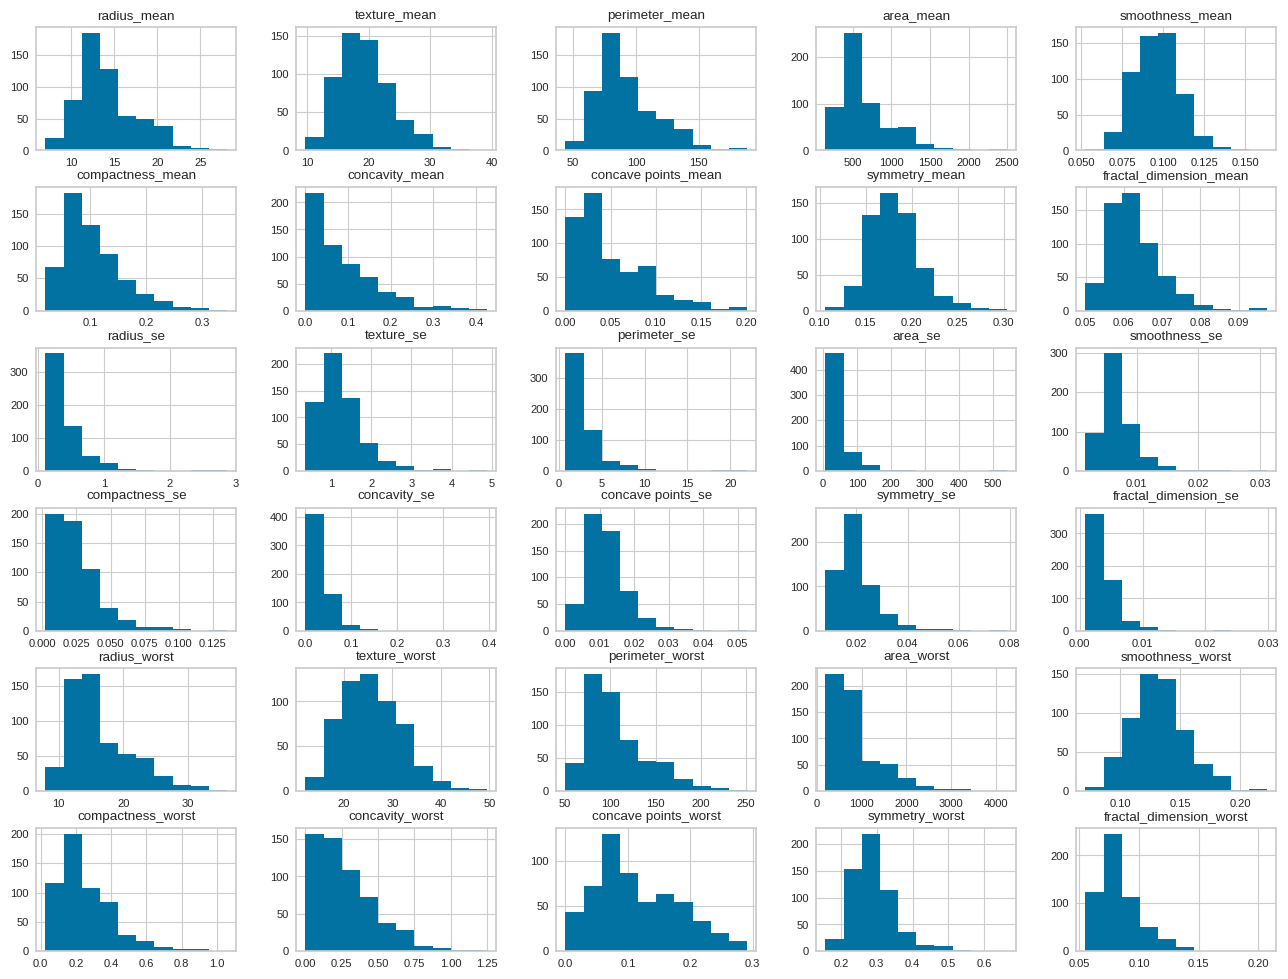

In [81]:
# Histogramas
numeric_columns = df.select_dtypes(include=['float32']).columns
df[numeric_columns].hist(figsize=(16, 12))
plt.show()

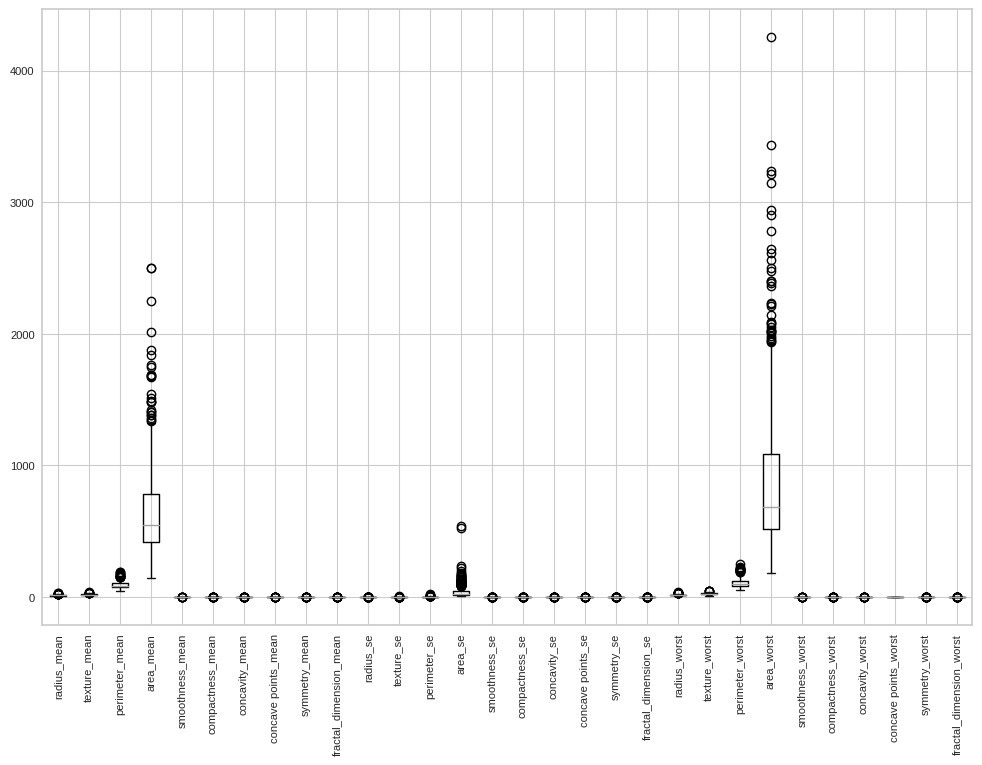

In [108]:
# Gráficos de caja (boxplots)
df[numeric_columns].boxplot(figsize=(12, 8), rot=90)
plt.show()

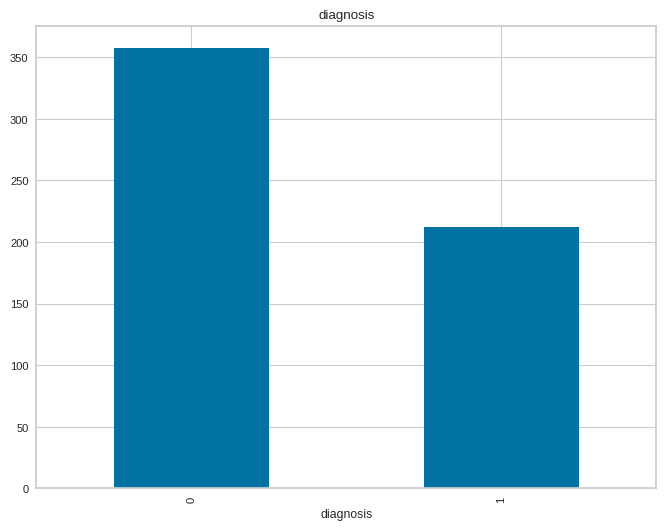

In [83]:
# Gráficos de barras
categorical_columns = df.select_dtypes(include=['int8']).columns
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', figsize=(8, 6), title=column)
    plt.show()

In [85]:
# Tablas de contingencia
for column in categorical_columns:
    contingency_table = pd.crosstab(df['diagnosis'], df[column])
    print(contingency_table)

diagnosis    0    1
diagnosis          
0          357    0
1            0  212


In [88]:
# ordenar la tabla de contingencia
for column in categorical_columns:
    print(f"Tabla de contingencia para la columna '{column}':")
    contingency_table = pd.crosstab(df['diagnosis'], df[column])
    contingency_table = contingency_table.sort_values(by='diagnosis', ascending=False)
    contingency_table = contingency_table.style.set_caption(f'Tabla de contingencia para la columna "{column}"')
    contingency_table = contingency_table.format("{:,}")
    display(contingency_table)


Tabla de contingencia para la columna 'diagnosis':


diagnosis,0,1
diagnosis,,
1,0,212
0,357,0


In [65]:
# Visualizar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
r

In [64]:
# Visualizar la distribución de clases
print("\nDistribución de clases:")
print(class_distribution)


Distribución de clases:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [20]:
from matplotlib import style

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


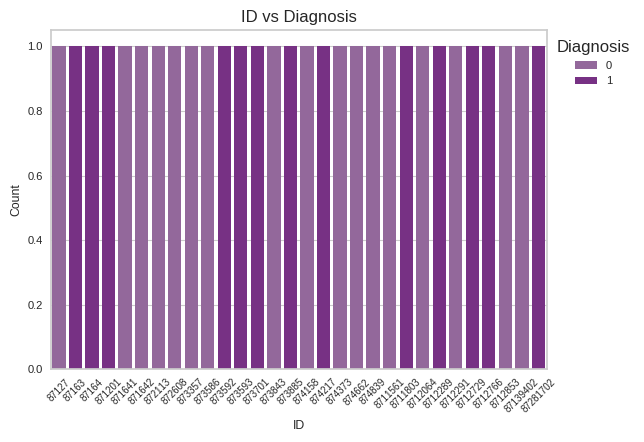

In [54]:
custom_palette = ["#995FA3", "#802392"]
sns.countplot(x="id", hue="diagnosis", data=df[160:190], palette=custom_palette)

plt.title("ID vs Diagnosis", fontsize=12)
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=45, fontsize=7)
plt.legend(title="Diagnosis", labels=["0", "1"], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


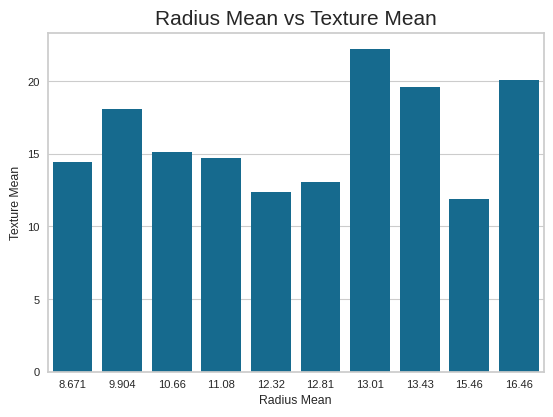

In [55]:
sns.barplot(x="radius_mean", y="texture_mean", data=df[170:180])
plt.title("Radius Mean vs Texture Mean",fontsize=15)
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()
plt.style.use("seaborn-v0_8-paper")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'diagnosis'),
  Text(1, 0, 'radius_mean'),
  Text(2, 0, 'texture_mean'),
  Text(3, 0, 'perimeter_mean'),
  Text(4, 0, 'area_mean'),
  Text(5, 0, 'smoothness_mean'),
  Text(6, 0, 'compactness_mean'),
  Text(7, 0, 'concavity_mean'),
  Text(8, 0, 'concave points_mean'),
  Text(9, 0, 'symmetry_mean'),
  Text(10, 0, 'fractal_dimension_mean')])

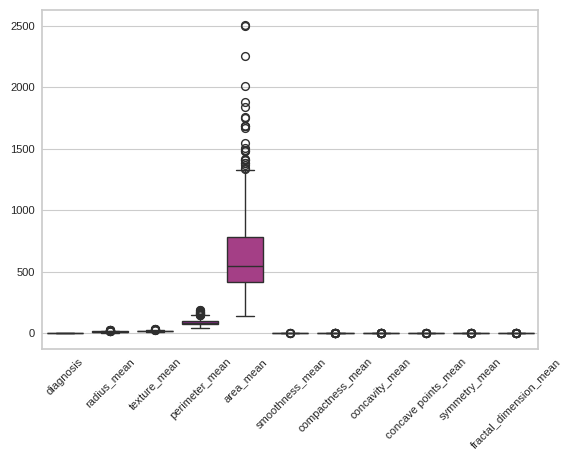

In [60]:
mean_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.boxplot(df[mean_col], palette='plasma')
plt.xticks(rotation=45, fontsize=8)


<Axes: xlabel='smoothness_mean', ylabel='perimeter_mean'>

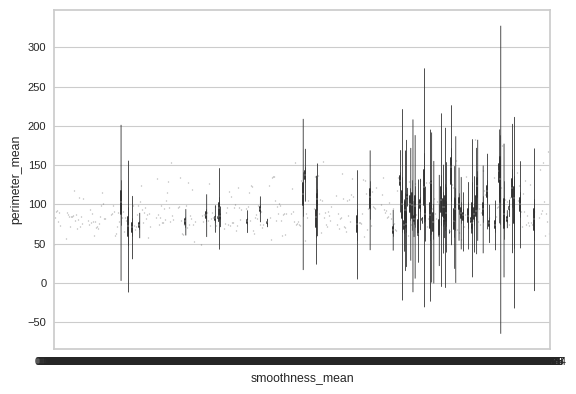

In [59]:
sns.violinplot(x="smoothness_mean",y="perimeter_mean",data=df)

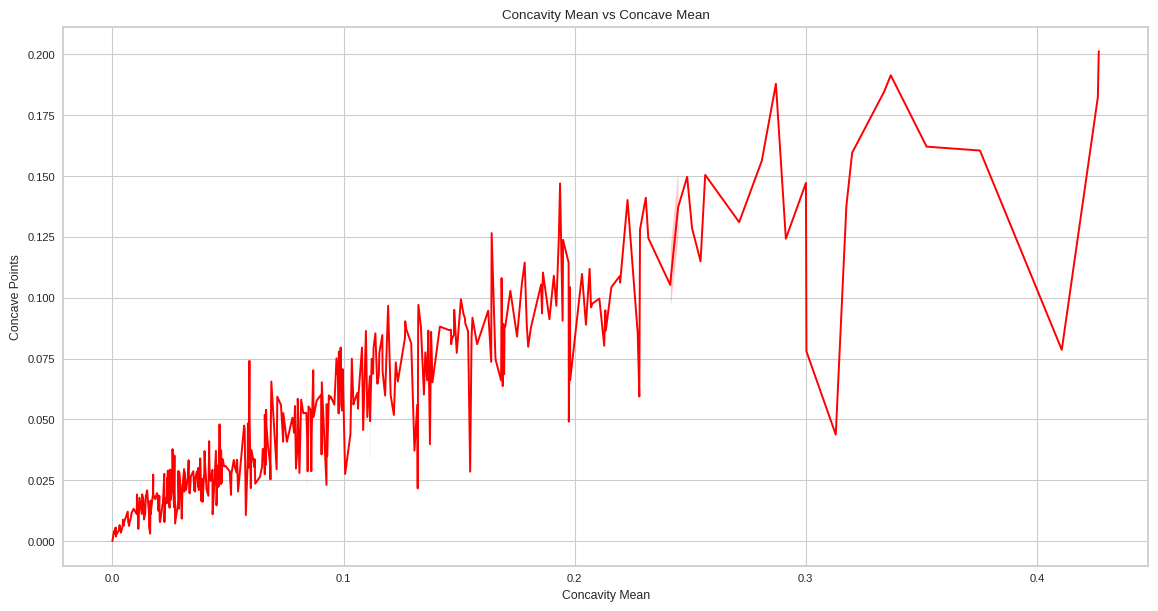

In [24]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "concavity_mean",y = "concave points_mean",data = df[0:400], color='red')
plt.title("Concavity Mean vs Concave Mean")
plt.xlabel("Concavity Mean")
plt.ylabel("Concave Points")
plt.show()



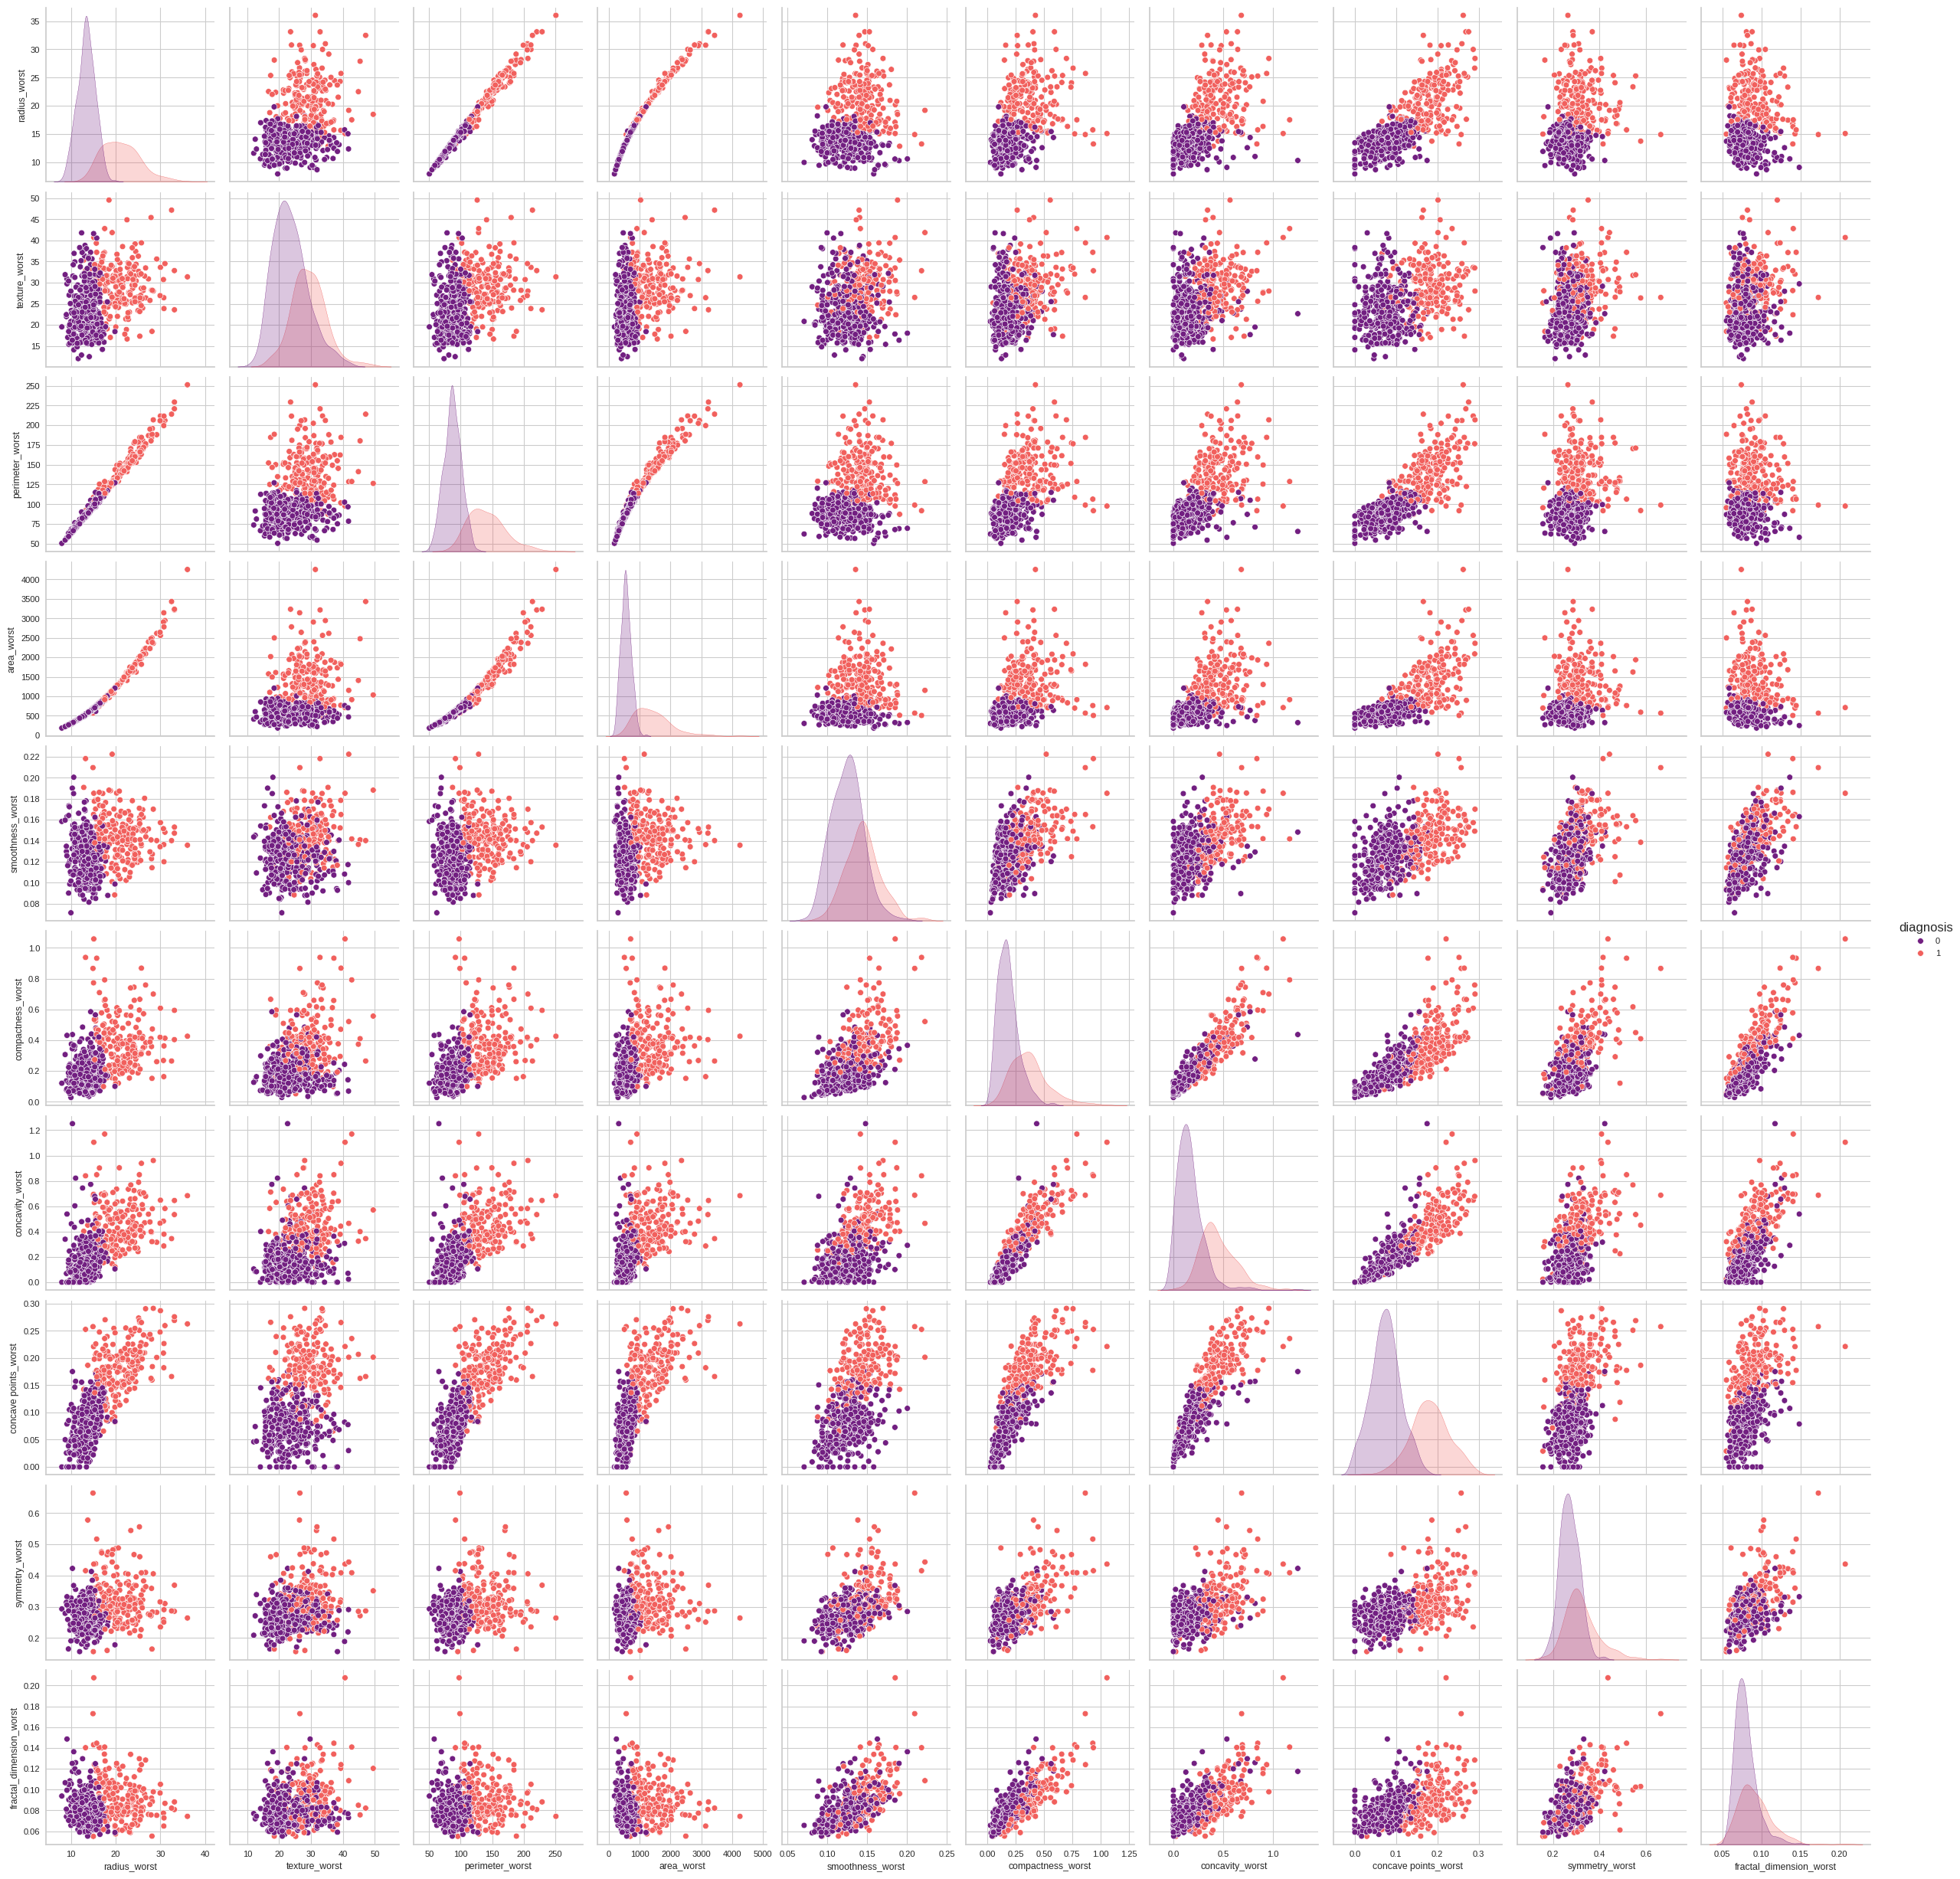

In [62]:
worst_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

sns.pairplot(df[worst_col],hue = 'diagnosis', palette="magma")

# Manejo desbalance de clases

In [28]:
# Separate features and target variable
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Define NearMiss undersampler
sm = NearMiss()

# Perform train-test split and undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Define stratified k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [29]:
import pandas as pd

# Concatenar las características de entrenamiento y la variable objetivo de entrenamiento
df_train = pd.concat([X_train, y_train], axis=1)


In [30]:
s = setup(data=df_train, target='diagnosis', session_id=79)

,Description,Value
0,Session id,79
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(426, 32)"
4,Transformed data shape,"(426, 32)"
5,Transformed train set shape,"(298, 32)"
6,Transformed test set shape,"(128, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [31]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9632,0.9876,0.9379,0.9635,0.9497,0.9207,0.9219,0.1140
ridge,Ridge Classifier,0.9499,0.9806,0.8841,0.9833,0.9289,0.8906,0.8959,0.0440
qda,Quadratic Discriminant Analysis,0.9498,0.9750,0.9295,0.9379,0.9332,0.8930,0.8936,0.0580
lightgbm,Light Gradient Boosting Machine,0.9495,0.9806,0.8924,0.9718,0.9293,0.8902,0.8933,0.4230
gbc,Gradient Boosting Classifier,0.9466,0.9773,0.9015,0.9552,0.9263,0.8844,0.8867,0.3380
et,Extra Trees Classifier,0.9466,0.9848,0.8917,0.9644,0.9253,0.8838,0.8867,0.1730
lda,Linear Discriminant Analysis,0.9397,0.9844,0.8667,0.9727,0.9142,0.8683,0.8741,0.0390
rf,Random Forest Classifier,0.9364,0.9792,0.8924,0.9398,0.9132,0.8631,0.8666,0.2290
ada,Ada Boost Classifier,0.9260,0.9664,0.8833,0.9235,0.9000,0.8414,0.8451,0.2470
lr,Logistic Regression,0.9125,0.9573,0.8477,0.9182,0.8751,0.8087,0.8163,0.7930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [35]:
print("Número de muestras en X_train:",len(X_train))
print("Número de muestras en X_test:", len(X_test))
print("Número de muestras en y_train:",len(y_train))
print("Número de muestras en y_test:", len(y_test))



Número de muestras en X_train: 426
Número de muestras en X_test: 143
Número de muestras en y_train: 426
Número de muestras en y_test: 143


In [36]:
from sklearn.ensemble import ExtraTreesClassifier

# Instanciar el clasificador Extra Trees
et_classifier = ExtraTreesClassifier(random_state=79)

# Ajustar el modelo a los datos de entrenamiento resampleados
et_classifier.fit(X_resampled, y_resampled)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=None,
                     oob_score=False, random_state=79, verbose=0,
                     warm_start=False)

In [37]:
from sklearn.metrics import roc_auc_score

# Obtener las probabilidades de predicción para las clases positivas (clase 1)
y_pred_proba = et_classifier.predict_proba(X_test)[:, 1]

# Calcular el AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("El AUC es:", auc)

El AUC es: 0.9986373165618448


In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Predicciones en los datos de prueba
y_pred = et_classifier.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("MCC:", mcc)


Accuracy: 0.9790209790209791
AUC: 0.9986373165618448
Recall: 0.9622641509433962
Precision: 0.9807692307692307
F1 Score: 0.9714285714285714
Kappa: 0.9548563611491108
MCC: 0.9549644877199515


In [40]:
from sklearn.linear_model import RidgeClassifierCV

# Instanciar el clasificador Ridge con validación cruzada
ridge_classifier = RidgeClassifierCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Ajustar el modelo a los datos de entrenamiento resampleados
ridge_classifier.fit(X_resampled, y_resampled)

# Predicciones en los datos de prueba
y_pred_ridge = ridge_classifier.predict(X_test)

# Calcular las métricas
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
auc_ridge = roc_auc_score(y_test, y_pred_ridge)
recall_ridge = recall_score(y_test, y_pred_ridge)
precision_ridge = precision_score(y_test, y_pred_ridge)
f1_ridge = f1_score(y_test, y_pred_ridge)
kappa_ridge = cohen_kappa_score(y_test, y_pred_ridge)
mcc_ridge = matthews_corrcoef(y_test, y_pred_ridge)

# Imprimir las métricas
print("Ridge Classifier Metrics:")
print("Accuracy:", accuracy_ridge)
print("AUC:", auc_ridge)
print("Recall:", recall_ridge)
print("Precision:", precision_ridge)
print("F1 Score:", f1_ridge)
print("Kappa:", kappa_ridge)
print("MCC:", mcc_ridge)

Ridge Classifier Metrics:
Accuracy: 0.965034965034965
AUC: 0.9567085953878407
Recall: 0.9245283018867925
Precision: 0.98
F1 Score: 0.9514563106796117
Kappa: 0.9241701134796904
MCC: 0.9251281457541922


Validar hiperparametros de ridge

In [42]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión para Ridge Classifier
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)

# Imprimir matriz de confusión
print("Confusion Matrix - Ridge Classifier:")
print(conf_matrix_ridge)

# Análisis del mejor hiperparámetro alpha para Ridge Classifier
print("Best alpha for Ridge Classifier:", ridge_classifier.alpha_)


Confusion Matrix - Ridge Classifier:
[[89  1]
 [ 4 49]]
Best alpha for Ridge Classifier: 10.0


In [44]:
from sklearn.linear_model import RidgeClassifier

# Instanciar el clasificador Ridge con el mejor valor de alpha
ridge_classifier_final = RidgeClassifier(alpha=10.0)

# Ajustar el modelo a todos los datos de entrenamiento
ridge_classifier_final.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_ridge_final = ridge_classifier_final.predict(X_test)

# Calcular métricas
accuracy_ridge_final = accuracy_score(y_test, y_pred_ridge_final)
precision_ridge_final = precision_score(y_test, y_pred_ridge_final)
recall_ridge_final = recall_score(y_test, y_pred_ridge_final)
f1_ridge_final = f1_score(y_test, y_pred_ridge_final)

# Imprimir métricas
print("Métricas del modelo Ridge Classifier con alpha=10:")
print("Accuracy:", accuracy_ridge_final)
print("Precision:", precision_ridge_final)
print("Recall:", recall_ridge_final)
print("F1-score:", f1_ridge_final)

Métricas del modelo Ridge Classifier con alpha=10:
Accuracy: 0.9230769230769231
Precision: 1.0
Recall: 0.7924528301886793
F1-score: 0.8842105263157894


confusion matrix

[[90  0]
 [11 42]]


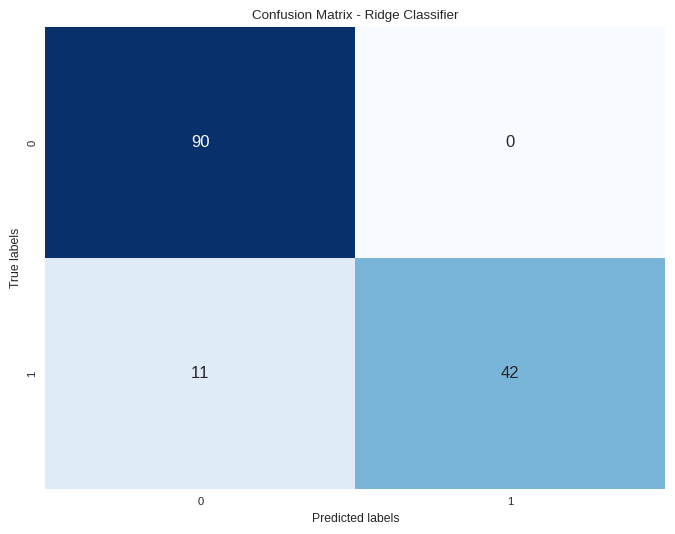

In [46]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_ridge_final)
print(conf_matrix)
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Ridge Classifier")
plt.show()

In [ ]:
# # Define metrics
# metricsLR = {
#     "accuracy": accuracy_score,
#     "precision": precision_score,
#     "recall": recall_score,
#     "f1": f1_score,
# }

# metricsRF = {
#     "accuracy": accuracy_score,
#     "precision": precision_score,
#     "recall": recall_score,
#     "f1": f1_score,
# }

# metricsKNN = {
#     "accuracy": accuracy_score,
#     "precision": precision_score,
#     "recall": recall_score,
#     "f1": f1_score,
# }

# metricsSVM = {
#     "accuracy": accuracy_score,
# }


# metricsXGB = {
#     "accuracy": accuracy_score,
#     "auc": roc_auc_score,
# }


# metricsMLP = {
#     "accuracy": accuracy_score,
#     "loss": log_loss,
# }

# metricsADA = {
#     "accuracy": accuracy_score,
# }

# def evaluate_model_with_undersampling(model, X, y, kfold, sm, metrics):
#     for train_index, test_index in kfold.split(X, y):
#         # Stratified sampling for training and testing sets
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         # Apply NearMiss undersampling to the training data
#         X_train_sampled, y_train_sampled = sm.fit_resample(X_train, y_train)

#         # Train the model
#         model.fit(X_train_sampled, y_train_sampled)

#         # Predict on the test set
#         y_pred = model.predict(X_test)

#         # Evaluate your model's performance using chosen metrics
#         for metric_name, metric_function in metrics.items():
#             metric_score = metric_function(y_test, y_pred)
#             print(f"{metric_name}: {metric_score:.4f}")

#         # Generate and print confusion matrix
#         cm = confusion_matrix(y_test, y_pred)
#         print("Confusion Matrix:")
#         print(cm)

#         # Generate and print classification report
#         print("Classification Report:")
#         print(classification_report(y_test, y_pred))


426


In [ ]:
# print(len(X_train))
# print(len(y_train))
# print(len(X_test))
# print(len(y_test))
# print(len(X_train_sampled))
# print(len(y_train_sampled))

In [ ]:
# from collections import Counter
# print('Original dataset shape %s' % Counter(y_train))
# print('Oversample dataset shape %s' % Counter(y_train_sampled)) #revisarrrr


# MODELS

*   Logistic Regression



In [ ]:
# # Logistic Regression
# model = LogisticRegression()

# # Evaluate the model
# results = evaluate_model_with_undersampling(model, X, y, kfold, sm, metricsLR)

# print("Training Score: ",model.score(X,y)*100)

In [ ]:
# Random Forest
model=RandomForestClassifier()
model=model.fit(X,y)

# Evaluate the model
results = evaluate_model_with_undersampling(model, X, y, kfold, sm, metrics=metricsRF)

print("Training Score: ",model.score(X,y)*100)


accuracy: 0.9561
precision: 0.9318
recall: 0.9535
f1: 0.9425
Confusion Matrix:
[[68  3]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy: 0.9649
precision: 1.0000
recall: 0.9070
f1: 0.9512
Confusion Matrix:
[[71  0]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

accuracy: 0.9474
precision: 0.9091
recall: 0.9524
f1: 0.9302
Confusion Matrix:
[[68  4]
 [ 2 40]]
Classi

In [ ]:
# XGBoost
model=XGBClassifier()

# Evaluate the model
results = evaluate_model_with_undersampling(model, X, y, kfold, sm, metrics=metricsXGB)

accuracy: 0.9649
auc: 0.9718
Confusion Matrix:
[[67  4]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.91      1.00      0.96        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

accuracy: 0.9737
auc: 0.9651
Confusion Matrix:
[[71  0]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy: 0.9298
auc: 0.9345
Confusion Matrix:
[[66  6]
 [ 2 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97 

In [ ]:
# MLP
model=MLPClassifier()

model_custom= MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Number of neurons in hidden layers
    activation='relu',              # Activation function
    solver='adam',                 # Optimization algorithm
    learning_rate_init=0.001,         # Initial learning rate
)

# Evaluate the model
results = evaluate_model_with_undersampling(model, X, y, kfold, sm, metrics=metricsMLP)

accuracy: 0.3772
loss: 22.4482
Confusion Matrix:
[[ 0 71]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.38      1.00      0.55        43

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114

accuracy: 0.3772
loss: 22.4482
Confusion Matrix:
[[ 0 71]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.38      1.00      0.55        43

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114

accuracy: 0.3684
loss: 22.7644
Confusion Matrix:
[[ 0 72]
 [ 0 42]]
Classification Report:
              precision    recall  f1-score   support

           0      

In [ ]:
# K-Nearest Neighbors
model=KNeighborsClassifier(n_neighbors=4)

# Evaluate the model
results = evaluate_model_with_undersampling(model, X, y, kfold, sm, metrics=metricsKNN)

In [ ]:
# Support Vector Classifier
model = SVC(kernel='rbf')

# Evaluate the model
results = evaluate_model_with_undersampling(model, X, y, kfold, sm, metrics=metricsSVM)




In [ ]:
# AdaBoost
model=AdaBoostClassifier()

# Evaluate the model
results = evaluate_model_with_undersampling(model, X, y, kfold, sm, metrics=metricsADA)

accuracy: 0.9561
Confusion Matrix:
[[67  4]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy: 0.9737
Confusion Matrix:
[[71  0]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy: 0.8947
Confusion Matrix:
[[65  7]
 [ 5 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        72
      

## **Hasta aqui va mi edicion**


